In [3]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
print("Done!")
import sys
sys.path.append("..")

print("Done!")

Done!
Done!


Phi


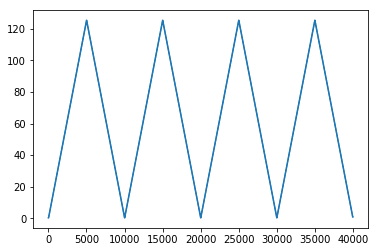

Pred Phi


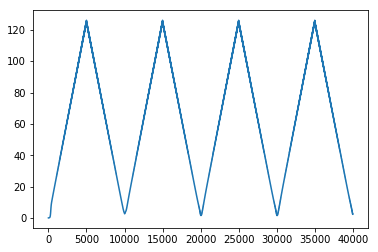

Phidot


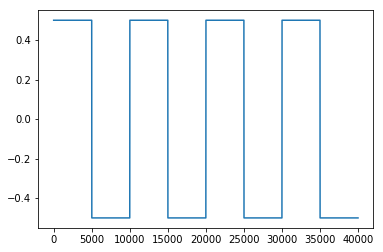

Pred Phidot


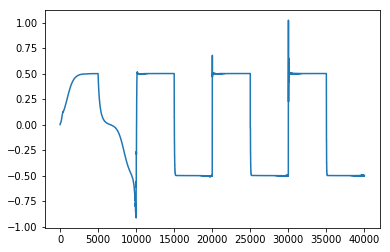

Mu1


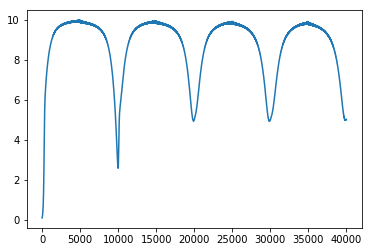

Mu2


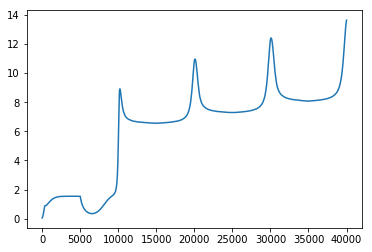

EZ1


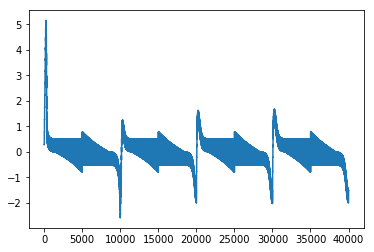

EZ2


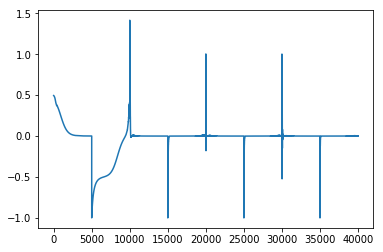

Ew1


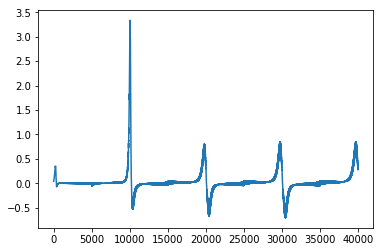

ThetaZ1


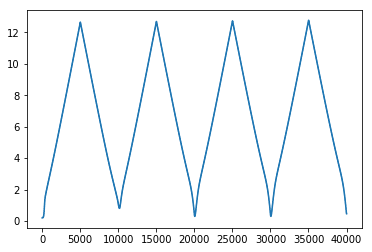

ThetaZ2


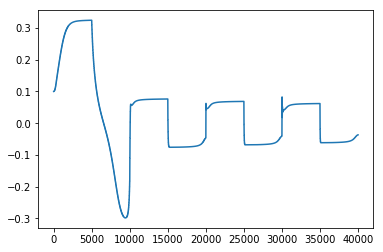

ThetaW1


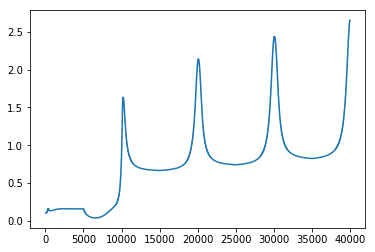

In [6]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
inference_rate = 0.1
weight_rate = 0.1
epochs = 2000
inference_num = 20
time = range(epochs * inference_num)

phi = [0.3]
phidot = [0.5]

# agent!
thetaz1 = [0.2]
thetaz2 = [0.1]
thetaw1 = [0.1]

mu1 = [0.1]
mu2 = [0.05]

ez1 = [phi[0] - (thetaz1[0] * mu1[0])]
ez2 = [phidot[0] - (thetaz2[0] * mu2[0])]
ew1 = [mu2[0] - (thetaw1[0] *mu1[0])] 
pred1 = [0]
pred2 = [0]
varz1 = 1
varz2 = 1
varw1 = 1
varw2 = 1
for i in range(1, inference_num*epochs):
    if i % inference_num == 0:
        phi.append(phi[i-1]+phidot[i-1])
        phidot.append(phidot[i-1])
        # update!
        if i % 5000 == 0:
            phidot[i] = -1 * phidot[i]
    # update prediction errors
    else:
        phi.append(phi[i-1])
        phidot.append(phidot[i-1])
        
    ez1.append(phi[i] - (thetaz1[i-1] * mu1[i-1]))
    ez2.append(phidot[i] - (thetaz2[i-1] * mu2[i-1]))
    ew1.append(mu2[i-1] - (thetaw1[i-1] * mu1[i-1]))
    # update the mus
    mu1grad = (ez1[i] * thetaz1[i-1]) + (ew1[i] * thetaw1[i-1])
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2grad = (ez2[i] * thetaz2[i-1]) + ew1[i]
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    
    #update the weights
    if i % inference_num == 0:
        thetaz1.append(thetaz1[i-1] + (learning_rate * (ez1[i]*mu1[i])))
        thetaz2.append(thetaz2[i-1] + learning_rate * (ez2[i] * mu2[i]))
        thetaw1.append(thetaw1[i-1] + learning_rate * (ew1[i] * mu1[i]))
    else:
        thetaz1.append(thetaz1[i-1])
        thetaz2.append(thetaz2[i-1])
        thetaw1.append(thetaw1[i-1])
        
    pred1.append(np.dot(mu1[i], thetaz1[i]))
    pred2.append(np.dot(mu2[i], thetaz2[i]))
        
print("Phi")
plt.plot(time, phi)
plt.show()
print("Pred Phi")
plt.plot(time, pred1)
plt.show()
print("Phidot")
plt.plot(time, phidot)
plt.show()
print("Pred Phidot")
plt.plot(time, pred2)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("EZ1")
plt.plot(time, ez1)
plt.show()
print("EZ2")
plt.plot(time, ez2)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("ThetaZ1")
plt.plot(time, thetaz1)
plt.show()
print("ThetaZ2")
plt.plot(time, thetaz2)
plt.show()
print("ThetaW1")
plt.plot(time, thetaw1)
plt.show()

Phi


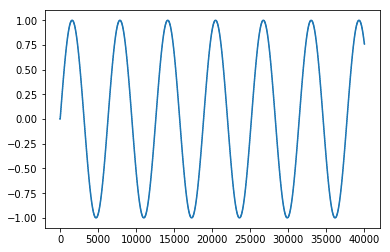

Pred Phi


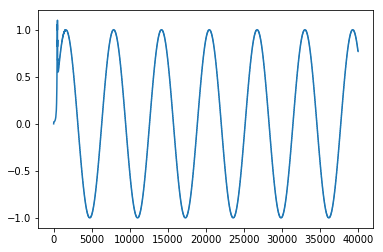

Phidot


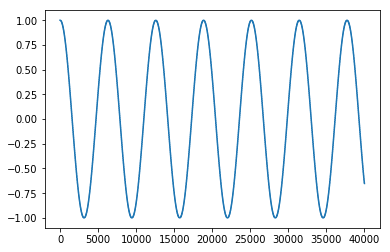

Pred Phidot


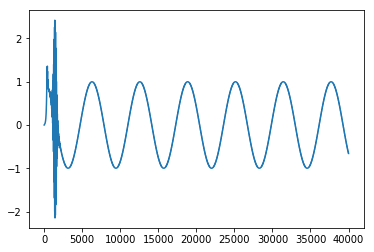

Mu1


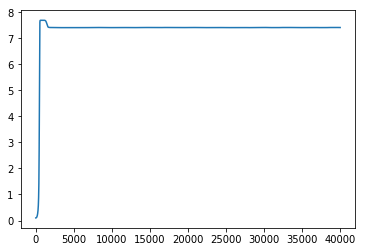

Mu2


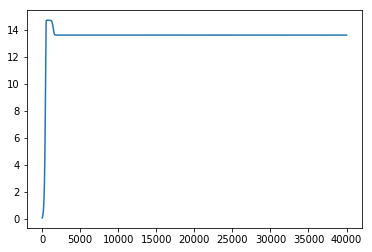

EZ1


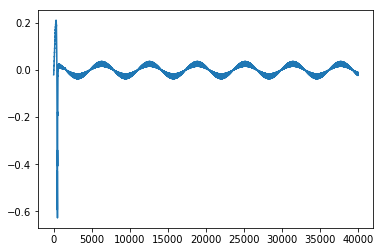

EZ2


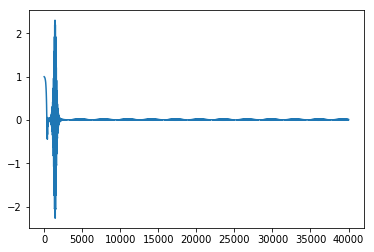

Ew1


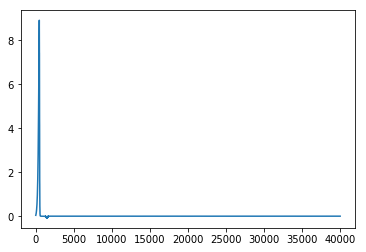

ThetaZ1


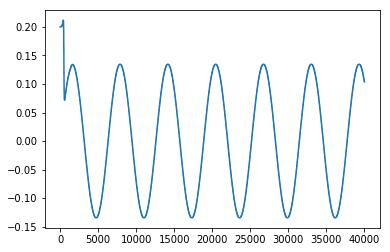

ThetaZ2


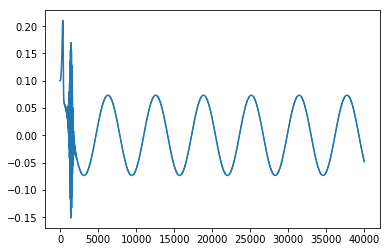

ThetaW1


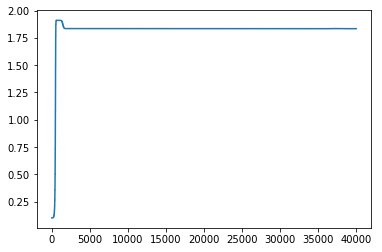

In [18]:
# dynamic base with sine function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
inference_rate = 0.1
weight_rate = 0.1
epochs = 2000
inference_num = 20
time = range(epochs * inference_num)
f = 1000

#environment
phi = [np.sin(0)]
phidot = [np.cos(0)]

# agent!
thetaz1 = [0.2]
thetaz2 = [0.1]
thetaw1 = [0.1]

mu1 = [0.1]
mu2 = [0.05]

ez1 = [phi[0] - (thetaz1[0] * mu1[0])]
ez2 = [phidot[0] - (thetaz2[0] * mu2[0])]
ew1 = [mu2[0] - (thetaw1[0] *mu1[0])] 
preds = [0]
preddots = [0]


varz1 = 1
varz2 = 1
varw1 = 1
varw2 = 1
for i in range(1, inference_num*epochs):
    if i % inference_num == 0:
        phi.append(np.sin(i/f))
        phidot.append(np.cos(i/f))
        # update!
        #if i % 5000 == 0:
         #   phidot[i] = -1 * phidot[i]
    # update prediction errors
    else:
        phi.append(phi[i-1])
        phidot.append(phidot[i-1])
    
    #phi.append(np.sin(i/f))
    #phidot.append(np.cos(i/f))
        
    ez1.append(phi[i] - (thetaz1[i-1] * mu1[i-1]))
    ez2.append(phidot[i] - (thetaz2[i-1] * mu2[i-1]))
    ew1.append(mu2[i-1] - (thetaw1[i-1] * mu1[i-1])) 
    mu1grad = (ez1[i] * thetaz1[i-1]) + (ew1[i] * thetaw1[i-1])
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2grad = (ez2[i] * thetaz2[i-1]) + ew1[i]
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    
    #update the weights
    if i % inference_num == 0:
        thetaz1.append(thetaz1[i-1] + (learning_rate * (ez1[i]*mu1[i])))
        thetaz2.append(thetaz2[i-1] + learning_rate * (ez2[i] * mu2[i]))
        thetaw1.append(thetaw1[i-1] + learning_rate * (ew1[i] * mu1[i]))
    else:
        thetaz1.append(thetaz1[i-1])
        thetaz2.append(thetaz2[i-1])
        thetaw1.append(thetaw1[i-1])
        
    preds.append(thetaz1[i] * mu1[i])
    preddots.append(thetaz2[i] * mu2[i])
        
print("Phi")
plt.plot(time, phi)
plt.show()
print("Pred Phi")
plt.plot(time, preds)
plt.show()
print("Phidot")
plt.plot(time, phidot)
plt.show()
print("Pred Phidot")
plt.plot(time, preddots)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("EZ1")
plt.plot(time, ez1)
plt.show()
print("EZ2")
plt.plot(time, ez2)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("ThetaZ1")
plt.plot(time, thetaz1)
plt.show()
print("ThetaZ2")
plt.plot(time, thetaz2)
plt.show()
print("ThetaW1")
plt.plot(time, thetaw1)
plt.show()

Phi


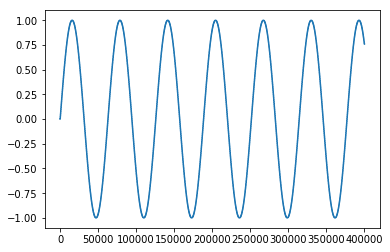

Pred Phi


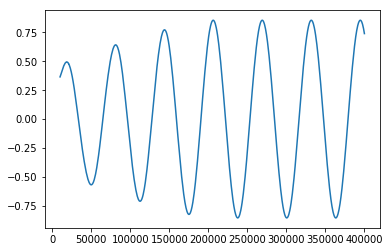

Phidot


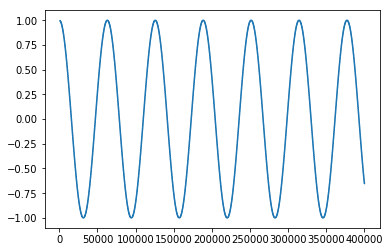

Pred Phidot


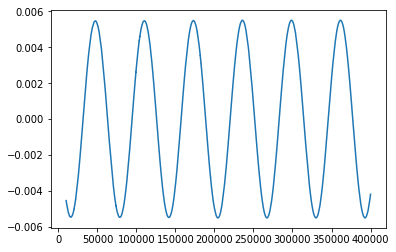

Phidotdot


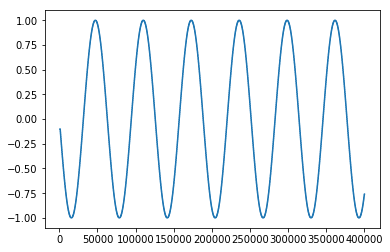

Pred Phidotdot


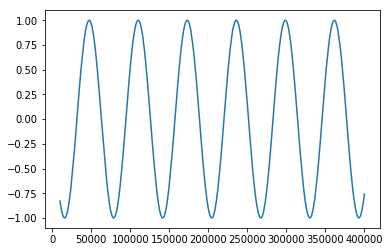

Mu1


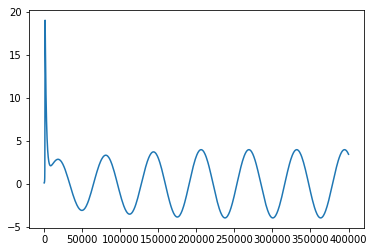

Mu2


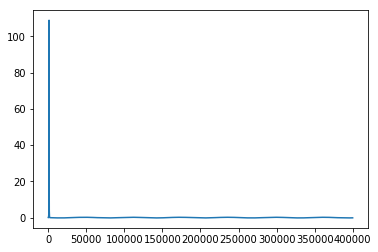

Mu3


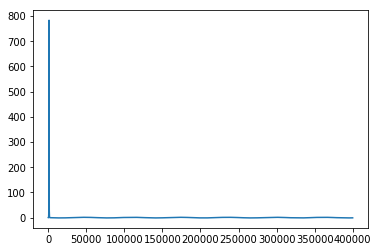

EZ1


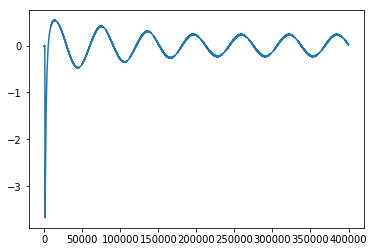

EZ2


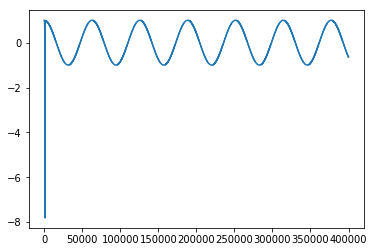

EZ3


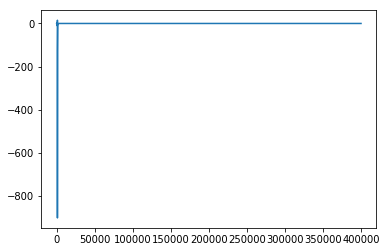

Ew1


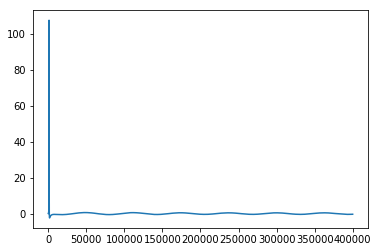

Ew2


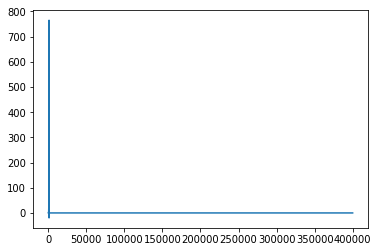

ThetaZ1


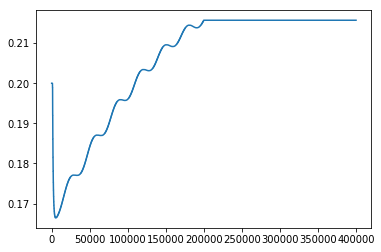

ThetaZ2


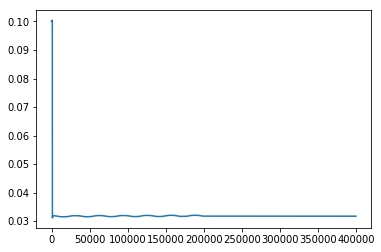

ThetaZ3


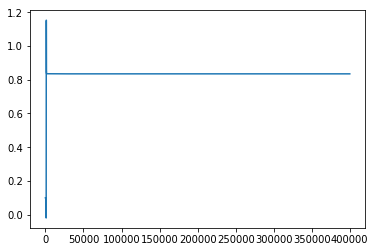

ThetaW1


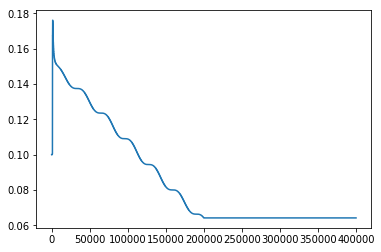

ThetaW2


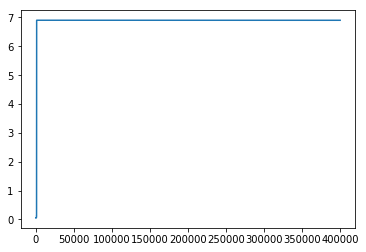

In [15]:
# three layer dynamical sine fucntion
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


learning_rate = 0.01
inference_rate = 0.1
weight_rate = 0.1
epochs = 2000
inference_num = 200
time = range(epochs * inference_num)
f = 10000

#environment
phi = [np.sin(0)]
phidot = [np.cos(0)]
phidotdot = [-1 * np.sin(0)]

# agent!
thetaz1 = [0.2]
thetaz2 = [0.1]
thetaw1 = [0.1]
thetaz3 = [0.1]
thetaw2 = [0.05]

mu1 = [0.1]
mu2 = [0.05]
mu3 = [0.05]

ez1 = [phi[0] - (thetaz1[0] * mu1[0])]
ez2 = [phidot[0] - (thetaz2[0] * mu2[0])]
ez3 = [phidotdot[0] - (thetaz3[0] * mu3[0])]
ew1 = [mu2[0] - (thetaw1[0] *mu1[0])]
ew2 = [mu3[0] - (thetaw2[0] * mu2[0])]

predphi = [0]
predphidot = [0]
predphidotdot = [0]

# assume variances are all one for now
varz1 = 1
varz2 = 1
varw1 = 1
varw2 = 1
for i in range(1, inference_num*epochs):
    if i % inference_num == 0:
        phi.append(np.sin(i/f))
        phidot.append(np.cos(i/f))
        phidotdot.append(-1 * np.sin(i/f))
        # update!
        #if i % 5000 == 0:
         #   phidot[i] = -1 * phidot[i]
    # update prediction errors
    else:
        phi.append(phi[i-1])
        phidot.append(phidot[i-1])
        phidotdot.append(phidotdot[i-1])
    
    #phi.append(np.sin(i/f))
    #phidot.append(np.cos(i/f))
        
    ez1.append(phi[i] - (thetaz1[i-1] * mu1[i-1]))
    ez2.append(phidot[i] - (thetaz2[i-1] * mu2[i-1]))
    ez3.append(phidotdot[i] - (thetaz3[i-1] * mu3[i-1]))
    ew1.append(mu2[i-1] - (thetaw1[i-1] * mu1[i-1])) 
    ew2.append(mu3[i-1] - (thetaw2[i-1] * mu2[i-1]))
    # update the mus
    mu1grad = (ez1[i] * thetaz1[i-1]) + (ew1[i] * thetaw1[i-1])
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2grad = (ez2[i] * thetaz2[i-1]) + (ew2[i] *thetaw2[i-1]) 
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    mu3grad = (ez3[i] * thetaz3[i-1]) + ew2[i]
    mu3.append(mu3[i-1] + (learning_rate * mu3grad))
    
    #update the weights
    if i % inference_num == 0 and i < 200000:
        thetaz1.append(thetaz1[i-1] + (0.01 * learning_rate * (ez1[i]*mu1[i])))
        thetaz2.append(thetaz2[i-1] + (0.01 * learning_rate * (ez2[i] * mu2[i])))
        thetaz3.append(thetaz3[i-1] + (0.01 * learning_rate * ez3[i] * mu3[i]))
        thetaw1.append(thetaw1[i-1] +  (0.01 * learning_rate * (ew1[i] * mu1[i])))
        thetaw2.append(thetaw2[i-1] + (0.01 * learning_rate * (ew2[i] * mu2[i])))
    else:
        thetaz1.append(thetaz1[i-1])
        thetaz2.append(thetaz2[i-1])
        thetaz3.append(thetaz3[i-1])
        thetaw1.append(thetaw1[i-1])
        thetaw2.append(thetaw2[i-1])
        
    predphi.append(thetaz1[i] * mu1[i])
    predphidot.append(thetaz2[i] * mu2[i])
    predphidotdot.append(thetaz3[i] * mu3[i])
        
    
    
print("Phi")
plt.plot(time, phi)
plt.show()
print("Pred Phi")
plt.plot(time[10000:], predphi[10000:])
plt.show()
print("Phidot")
plt.plot(time[1000:], phidot[1000:])
plt.show()
print("Pred Phidot")
plt.plot(time[10000:], predphidot[10000:])
plt.show()
print("Phidotdot")
plt.plot(time[1000:], phidotdot[1000:])
plt.show()
print("Pred Phidotdot")
plt.plot(time[10000:], predphidotdot[10000:])
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("Mu3")
plt.plot(time, mu3)
plt.show()
print("EZ1")
plt.plot(time, ez1)
plt.show()
print("EZ2")
plt.plot(time, ez2)
plt.show()
print("EZ3")
plt.plot(time, ez3)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("Ew2")
plt.plot(time, ew2)
plt.show()
print("ThetaZ1")
plt.plot(time, thetaz1)
plt.show()
print("ThetaZ2")
plt.plot(time, thetaz2)
plt.show()
print("ThetaZ3")
plt.plot(time, thetaz3)
plt.show()
print("ThetaW1")
plt.plot(time, thetaw1)
plt.show()
print("ThetaW2")
plt.plot(time, thetaw2)
plt.show()


Phi


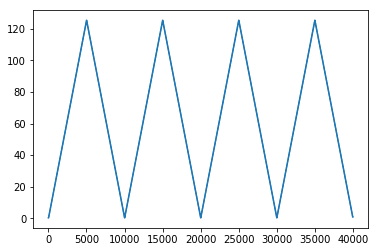

Phidot


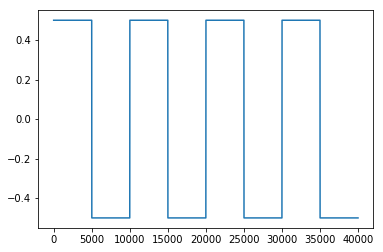

Mu1


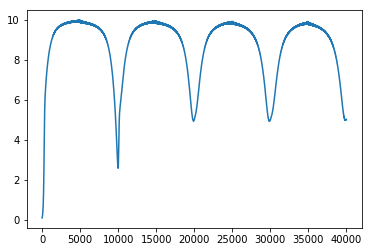

Mu2


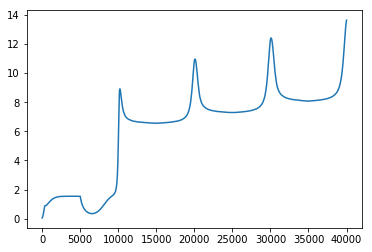

EZ1


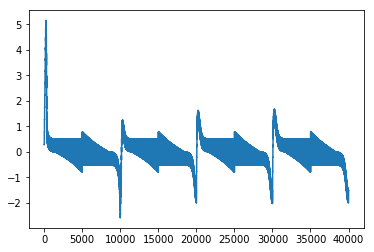

EZ2


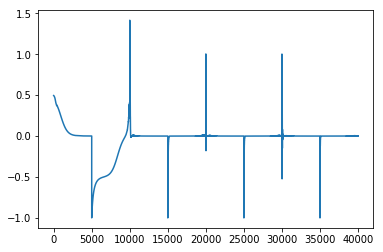

Ew1


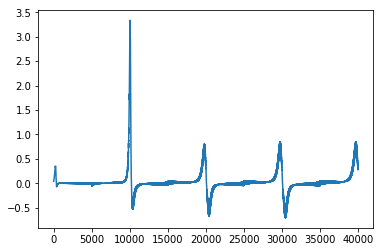

ThetaZ1


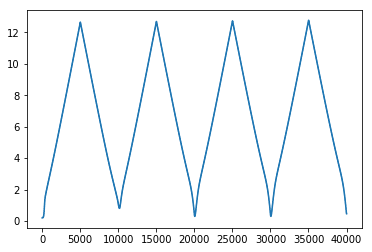

ThetaZ2


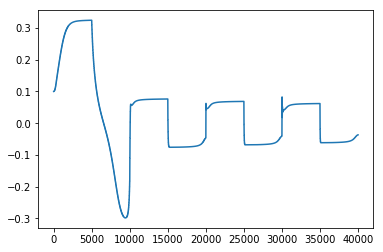

ThetaW1


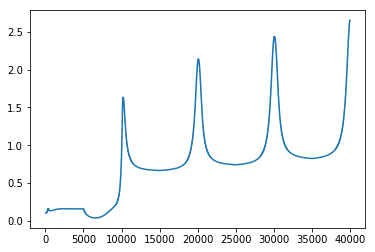

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.01
inference_rate = 0.1
weight_rate = 0.1
epochs = 2000
inference_num = 20
time = range(epochs * inference_num)

#environment
phi = [0.3]
phidot = [0.5]

# agent!
thetaz1 = [0.2]
thetaz2 = [0.1]
thetaw1 = [0.1]

mu1 = [0.1]
mu2 = [0.05]

ez1 = [phi[0] - (thetaz1[0] * mu1[0])]
ez2 = [phidot[0] - (thetaz2[0] * mu2[0])]
ew1 = [mu2[0] - (thetaw1[0] *mu1[0])]
varz1 = 1
varz2 = 1
varw1 = 1
varw2 = 1
for i in range(1, inference_num*epochs):
    if i % inference_num == 0:
        phi.append(phi[i-1]+phidot[i-1])
        phidot.append(phidot[i-1])
        # update!
        if i % 5000 == 0:
            phidot[i] = -1 * phidot[i]
    # update prediction errors
    else:
        phi.append(phi[i-1])
        phidot.append(phidot[i-1])
        
    ez1.append(phi[i] - (thetaz1[i-1] * mu1[i-1]))
    ez2.append(phidot[i] - (thetaz2[i-1] * mu2[i-1]))
    ew1.append(mu2[i-1] - (thetaw1[i-1] * mu1[i-1])) 
    # update the mus
    mu1grad = (ez1[i] * thetaz1[i-1]) + (ew1[i] * thetaw1[i-1]) 
    mu1.append(mu1[i-1] + (learning_rate * mu1grad))
    mu2grad = (ez2[i] * thetaz2[i-1]) + ew1[i] 
    mu2.append(mu2[i-1] + (learning_rate * mu2grad))
    #update the weights
    if i % inference_num == 0:
        thetaz1.append(thetaz1[i-1] + (learning_rate * (ez1[i]*mu1[i])))
        thetaz2.append(thetaz2[i-1] + learning_rate * (ez2[i] * mu2[i]))
        thetaw1.append(thetaw1[i-1] + learning_rate * (ew1[i] * mu1[i]))
       
    else:
        thetaz1.append(thetaz1[i-1])
        thetaz2.append(thetaz2[i-1])
        thetaw1.append(thetaw1[i-1])
        
print("Phi")
plt.plot(time, phi)
plt.show()
print("Phidot")
plt.plot(time, phidot)
plt.show()
print("Mu1")
plt.plot(time, mu1)
plt.show()
print("Mu2")
plt.plot(time, mu2)
plt.show()
print("EZ1")
plt.plot(time, ez1)
plt.show()
print("EZ2")
plt.plot(time, ez2)
plt.show()
print("Ew1")
plt.plot(time, ew1)
plt.show()
print("ThetaZ1")
plt.plot(time, thetaz1)
plt.show()
print("ThetaZ2")
plt.plot(time, thetaz2)
plt.show()
print("ThetaW1")
plt.plot(time, thetaw1)
plt.show()

In [112]:

class Env(object):
    
    def __init__(self, phi_start, phidot):
        self.phi_start = np.array(phi_start)
        self.phidot = np.array(phidot)
        self.phis = [phi_start]
        self.phidots = [self.phidot]
        self.phi = self.phi_start
        self.num_steps = 0
        
    def step(self):
        self.phi = self.phi + self.phidot 
        #print(self.phi)
        self.phis.append(self.phi)
        self.phidots.append(self.phidot)
        self.num_steps +=1
        return (self.phi, self.phidot)
    
    def start(self):
        return (self.phi, self.phidot)
    
    
class Layer(object):
    
    def __init__(self,sensory_dimension, top_down_dimension, layer_dimension,learning_rate = 0.01, sensory_variance=1, dynamical_variance=1, initializer= default_gaussian_initializer): # not that difficult to be honest... larning rate can be defined per lay or per network probably
        self.sensory_dimension = sensory_dimension
        self.top_down_dimension = top_down_dimension        
        self.layer_dimension = layer_dimension
        self.sensory_variance = sensory_variance
        self.dynamical_variance = dynamical_variance
        self.mu= np.random.normal(0, 0.1, [self.layer_dimension, 1])
        self.mus = []
        self.ezs = []
        self.ews = []
        self.sensory_weights = np.random.normal(0, 0.1, [self.sensory_dimension, self.layer_dimension])
        self.dynamical_weights = np.random.normal(0, 0.1, [self.top_down_dimension, self.layer_dimension])
        self.thetazs = []
        self.thetaws = []
        self.sensory_pe = 0
        self.dynamical_pe = 0
        self.learning_rate = learning_rate

        
    
    def run(self, sense_data, bottom_up_pe, top_down_mu, learning=False):
        #calculate prediction errors
        if top_down_mu is None:
            top_down_mu = np.zeros([self.layer_dimension,1])
        sense_data = np.reshape(sense_data, [len(sense_data), 1])
        #print(self.sensory_weights.shape)
        #print(self.mu.shape)
        #print(sense_data.shape)
        #print(sense_data)
        #print(type(sense_data))
        #print("\n")
        pred = np.dot(self.sensory_weights, self.mu)
        #print(pred.shape)
        #print(pred)
        #print(type(pred))
        self.sensory_pe = np.subtract(sense_data, pred)
        #print(self.sensory_pe.shape)
        #print(self.sensory_pe)
        self.dynamical_pe = top_down_mu - np.dot(self.dynamical_weights, self.mu)
        # update states
        #print(self.sensory_weights.T.shape)
        #print(self.sensory_pe.shape)
        #print(self.dynamical_weights.T.shape)
        #print(self.dynamical_pe.shape)
        #print(bottom_up_pe.shape)
        state_grad = np.dot(self.sensory_weights.T, self.sensory_pe) + np.dot(self.dynamical_weights.T, self.dynamical_pe) + bottom_up_pe
        self.mu += self.learning_rate * state_grad
        if learning:
            # update weights
            self.sensory_weights += self.learning_rate * (np.dot(self.sensory_pe, self.mu.T))
            self.dynamical_weights += self.learning_rate * (np.dot(self.dynamical_pe, self.mu.T))
            
        self.mus.append(self.mu)
        self.ezs.append(np.sum(self.sensory_pe))
        self.ews.append(np.sum(self.dynamical_pe))
        self.thetazs.append(self.sensory_weights)
        self.thetaws.append(self.dynamical_weights)
        pred = np.dot(self.sensory_weights, self.mu)
        return pred, self.dynamical_pe, self.mu 

class Model(object):
    
    def __init__(self,env, epochs, inference_runs):
        self.env = env
        self.layers = []
        self.epochs = epochs
        self.inference_runs = inference_runs
        self.phis = []
        self.predictions = []
        self.prediction_errors = []
        self.preds = []
        self.pes = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def initialize(self):
        self.predictions.append(None)
        for layer in self.layers:
            self.predictions.append(None)
            self.prediction_errors.append(np.zeros([layer.layer_dimension, 1]))
            self.preds.append([])
            self.pes.append([])
        self.prediction_errors.append(None)
            
        
    def train(self):
        
        for i in range(self.epochs * self.inference_runs):
            if i % self.inference_runs == 0:
                self.phis = self.env.step()
                #print(self.phis)
            
            for j, layer in enumerate(self.layers):
                if i %self.inference_runs == 0:
                    pred, up, down = layer.run(self.phis[j],self.prediction_errors[j], self.predictions[j+1], learning=True)
                else:
                    pred, up, down = layer.run(self.phis[j],self.prediction_errors[j], self.predictions[j+1])
                self.prediction_errors[j+1] = up
                self.predictions[j] = down
                self.preds[j].append(np.sum(pred))
                self.pes[j].append(np.sum(up))
        return self.preds, self.pes
                
    
    print("Done!")   
    

            
        

Done!


Preds


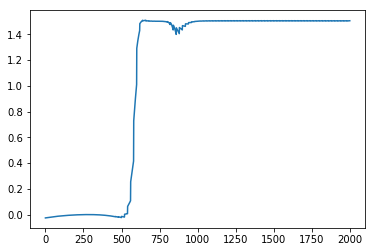

Pes


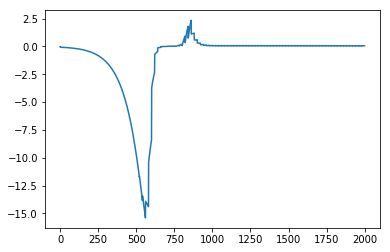

Preds


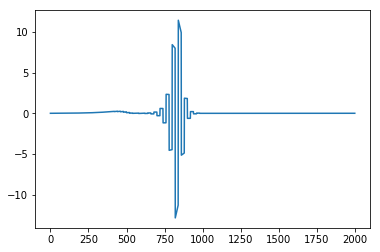

Pes


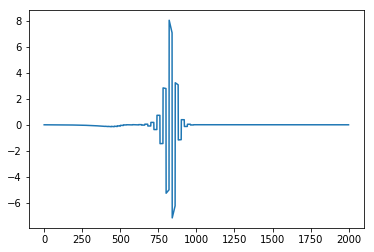

(2000,)
Sensory pes: layer:  0


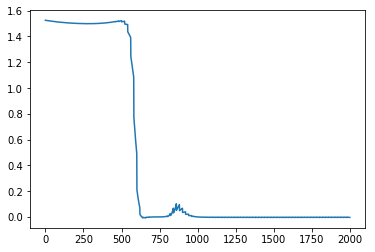

Dynamical pes: layer:  0


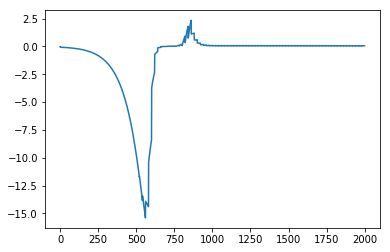

(2000,)
Sensory pes: layer:  1


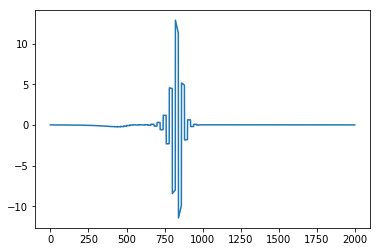

Dynamical pes: layer:  1


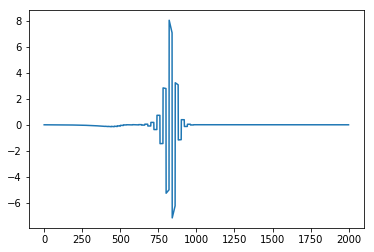

In [113]:

env = Env([0.5, 1], [0.1, -0.1])
model = Model(env, 100, 20)
model.add(Layer(2,2,2,0.01))
model.add(Layer(2,2,2,0.01))
model.initialize()
model.train()
time = range(model.epochs * model.inference_runs)
# plots...
print("Preds")
plt.plot(time, model.preds[0])
plt.show()
print("Pes")
plt.plot(time, model.pes[0])
plt.show()
print("Preds")
plt.plot(time, model.preds[1])
plt.show()
print("Pes")
plt.plot(time, model.pes[1])
plt.show()
for i,layer in enumerate(model.layers):
    print(np.array(layer.ezs).shape)
    print("Sensory pes: layer: " , i)
    plt.plot(time, layer.ezs)
    plt.show()
    print("Dynamical pes: layer: " , i)
    plt.plot(time, layer.ews)
    plt.show()